In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
sal_data = pd.read_csv("salary.csv")
sal_data[0:5] #importing the salary data

,customer_id,avg_balance,age,salary_92,frequency,frequency_per_yr,annual_salary,sum_balance,sum_pos_92,pos_frequency_yr,norm_sal,norm_spend,norm_avg_bal,avg_balance_binned,age_binned,frequency_per_yr_binned,pos_frequency_yr_binned,annual_salary_binned
0,CUS-1005756958,4718.665385,53,970.47,13,51.576087,50053.045109,54539.85,1810.86,7184.390217,0.356953,0.184420,0.017865,Low,Middle,High,Low,Low
1,CUS-1117979751,11957.202857,21,3578.65,7,27.771739,99385.334239,464628.82,3975.82,15773.633696,0.708765,0.404902,0.045270,Low,Young,Medium,Medium,Medium
2,CUS-1140341822,5841.720000,28,1916.51,6,23.804348,45621.270652,372880.59,4389.54,17415.022826,0.325348,0.447036,0.022117,Low,Young,Medium,Medium,Low
3,CUS-1147642491,8813.467692,34,1711.39,13,51.576087,88266.799457,709979.24,3885.75,15416.290761,0.629474,0.395729,0.033368,Low,Young,High,Medium,Medium
4,CUS-1196156254,23845.717143,34,3903.73,7,27.771739,108413.371196,3582356.98,4940.61,19601.333152,0.773149,0.503158,0.090281,Low,Young,Medium,Medium,High


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [5]:
pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=d2e7bffc920f69331dbc8d5f074b3e56582c4f80898440067438b95dd2d9841d
  Stored in directory: c:\users\parachute\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


<h2>Pre-processing</h2>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

In [7]:
X = sal_data[['avg_balance_binned', 'age_binned', 'frequency_per_yr_binned', 'pos_frequency_yr_binned']].values
X[0:5] 

array([['Low', 'Middle', 'High', 'Low'],
       ['Low', 'Young', 'Medium', 'Medium'],
       ['Low', 'Young', 'Medium', 'Medium'],
       ['Low', 'Young', 'High', 'Medium'],
       ['Low', 'Young', 'Medium', 'Medium']], dtype=object)

In [8]:
from sklearn import preprocessing

le_avg_balance_binned = preprocessing.LabelEncoder()
le_avg_balance_binned.fit(['Low', 'Medium', 'High'])
X[:,0] = le_avg_balance_binned.transform(X[:,0]) 


le_age_binned = preprocessing.LabelEncoder()
le_age_binned.fit([ 'Young', 'Middle', 'Old'])
X[:,1] = le_age_binned.transform(X[:,1])


le_frequency_per_yr_binned = preprocessing.LabelEncoder()
le_frequency_per_yr_binned.fit([ 'Low', 'Medium', 'High'])
X[:,2] = le_frequency_per_yr_binned.transform(X[:,2]) 

le_pos_frequency_yr_binned= preprocessing.LabelEncoder()
le_pos_frequency_yr_binned.fit([ 'Low', 'Medium', 'High'])
X[:,3] = le_pos_frequency_yr_binned.transform(X[:,3]) 

X[0:5]

array([[1, 0, 0, 1],
       [1, 2, 2, 2],
       [1, 2, 2, 2],
       [1, 2, 0, 2],
       [1, 2, 2, 2]], dtype=object)

In [10]:
y = sal_data[["annual_salary_binned"]].values
y[0:5]

array([['Low'],
       ['Medium'],
       ['Low'],
       ['Medium'],
       ['High']], dtype=object)

In [11]:
le_annual_salary_binned = preprocessing.LabelEncoder()
le_annual_salary_binned.fit(['Low', 'Medium', 'High'])
y[:,0] = le_annual_salary_binned.transform(y[:, 0]) 
y=y.astype('int')
y[0:5]

array([[1],
       [2],
       [1],
       [2],
       [0]])

<div"setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [12]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<div "modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [13]:
salary_tree = DecisionTreeClassifier(criterion="entropy", max_depth = None)
salary_tree  # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
salary_tree.fit(X_trainset,y_trainset)
salary_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<div "prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [15]:
pred_tree = salary_tree.predict(X_testset)

In [16]:
print (pred_tree [0:10])
print (y_testset [0:10])

[1 1 1 1 1 0 1 1 1 1]
[[2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


<div "evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [17]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, pred_tree))

DecisionTrees's Accuracy:  0.5333333333333333


<div "visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(salary_tree, out_file="salary_tree.dot", class_names=["Low", "Medium", "High"],
                feature_names=sal_data.columns[13:17], impurity=False, filled=True)

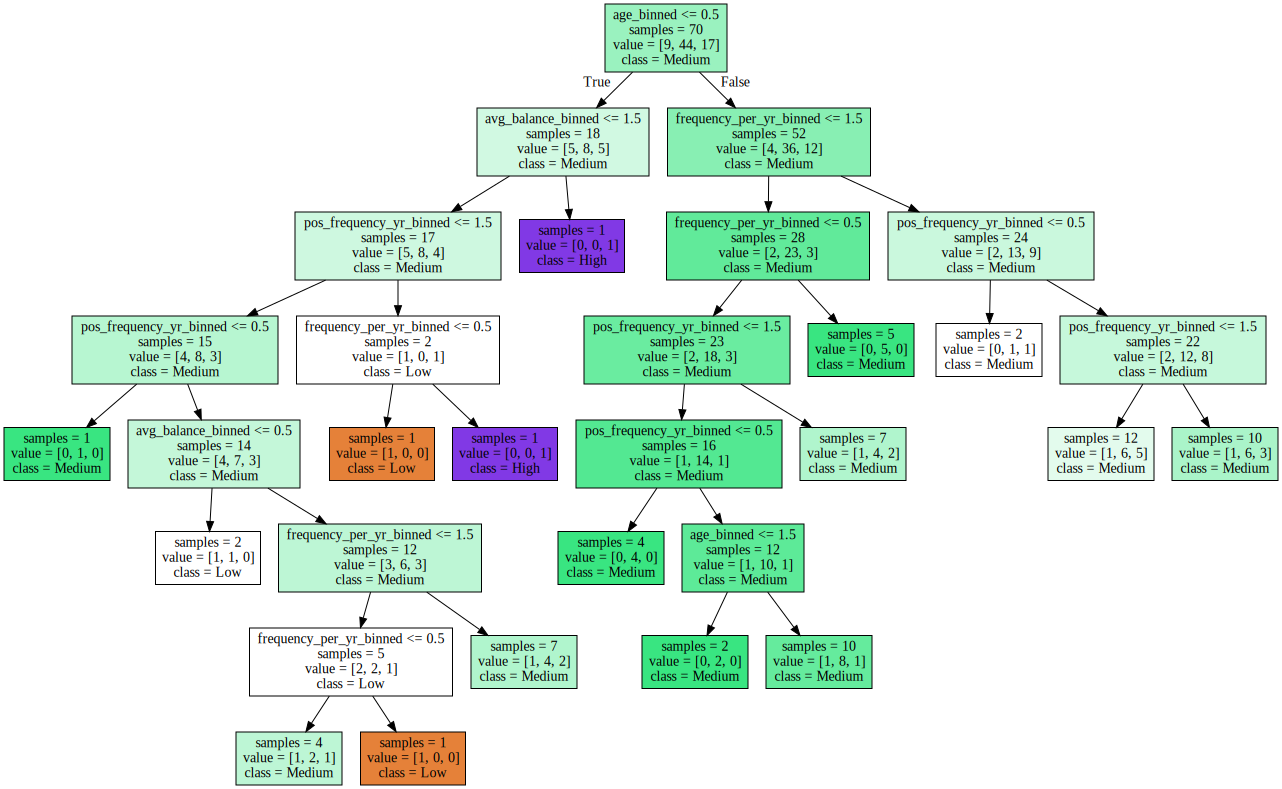

In [19]:
import graphviz
with open("salary_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)